In [1]:
from model_classes import AttnOnly, RelationalModel
from anaphora_datasets_helper import generate_anaphora_datasets, generate_sorting_dataset
from helper import train_model, test_example, plot_attn_patterns, plot_final_patterns
from torch import save, load

In [2]:
ds_train, ds_test = generate_anaphora_datasets("./complex", excluded_females=5, exclude_men=False)
# ds_train, ds_test = generate_sorting_dataset()

Length of corpus train: 57791


## Sorting Task

Here the model is given a sequence of letters, and it must sort them alphabetically. Trained using a decoder-only version of both networks.

In [23]:
num_epochs =  5
print_every = 1

for i in range(3):
    print("TRAINING ATTN ONLY MODEL")
    model_attnOnly = AttnOnly(vocab_size=len(ds_train.vocab), embed_dim=128, num_heads=4, num_layers=2, ctx_length=32, dropout=0.1)
    (attnOnly_loss_history, attnOnly_test_accuracy_history) = train_model(model_attnOnly, ds_train, ds_test, num_epochs, print_every, batch_size=32)

    print("\n")

    print("TRAINING RELATIONAL MODEL")
    model_relational = RelationalModel(vocab_size=len(ds_train.vocab), embed_dim=128, symbol_dim=128, num_heads=4, num_layers=1, ctx_length=32, dropout=0.1)
    (relational_loss_history, relational_test_accuracy_history) = train_model(model_relational, ds_train, ds_test, num_epochs, print_every, batch_size=32)

    save(model_relational, f=f"./models/relational_{i}")
    save(model_attnOnly, f=f"./models/attnOnly_{i}")

    print("\n\n")

TRAINING ATTN ONLY MODEL
Epoch 1 Train Loss 0.04488 Test Accuracy 0.973
Epoch 2 Train Loss 0.00337 Test Accuracy 0.987
Epoch 3 Train Loss 0.00311 Test Accuracy 0.976
Epoch 4 Train Loss 0.00259 Test Accuracy 0.991
Epoch 5 Train Loss 0.00241 Test Accuracy 0.998


TRAINING RELATIONAL MODEL
Epoch 1 Train Loss 0.02234 Test Accuracy 0.985
Epoch 2 Train Loss 0.00262 Test Accuracy 0.988
Epoch 3 Train Loss 0.00231 Test Accuracy 0.996
Epoch 4 Train Loss 0.00221 Test Accuracy 0.993
Epoch 5 Train Loss 0.00217 Test Accuracy 0.996



TRAINING ATTN ONLY MODEL
Epoch 1 Train Loss 0.04603 Test Accuracy 0.929
Epoch 2 Train Loss 0.00416 Test Accuracy 0.992
Epoch 3 Train Loss 0.00270 Test Accuracy 0.981
Epoch 4 Train Loss 0.00274 Test Accuracy 0.989
Epoch 5 Train Loss 0.00250 Test Accuracy 0.986


TRAINING RELATIONAL MODEL
Epoch 1 Train Loss 0.02678 Test Accuracy 0.977
Epoch 2 Train Loss 0.00297 Test Accuracy 0.971
Epoch 3 Train Loss 0.00261 Test Accuracy 0.971
Epoch 4 Train Loss 0.00261 Test Accuracy 0.96

===== TESTING NEW EXAMPLE =====
input: <SOS> Alice friend of Isabella throws herself <UNK> throws Alice Alice
model out: throws Alice Alice <EOS>
correct :)


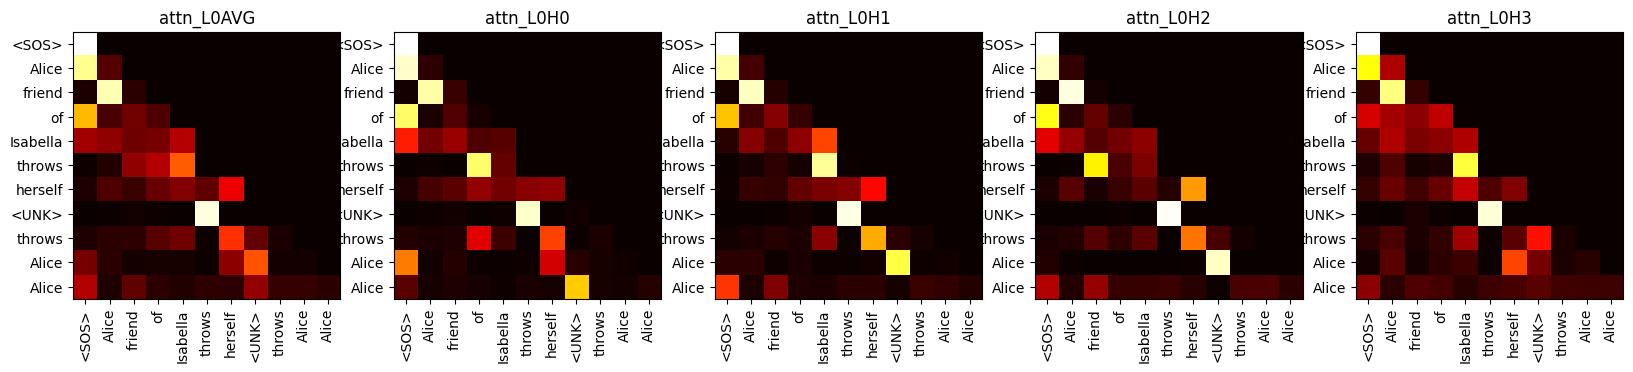

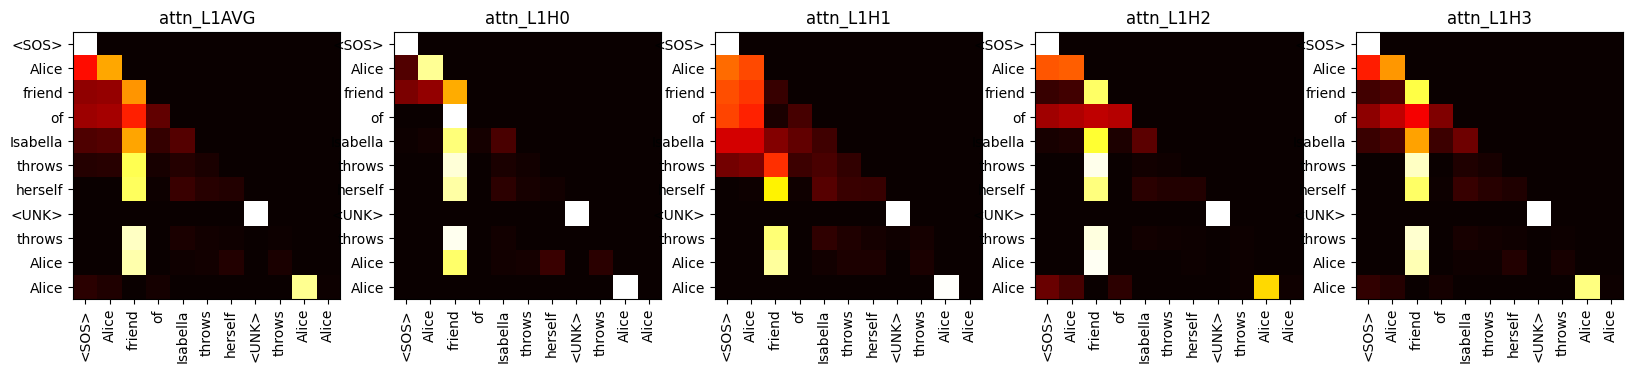

===== TESTING NEW EXAMPLE =====
input: <SOS> Alice friend of Isabella throws herself <UNK> throws Alice Alice
model out: throws Alice Alice <EOS>
correct :)


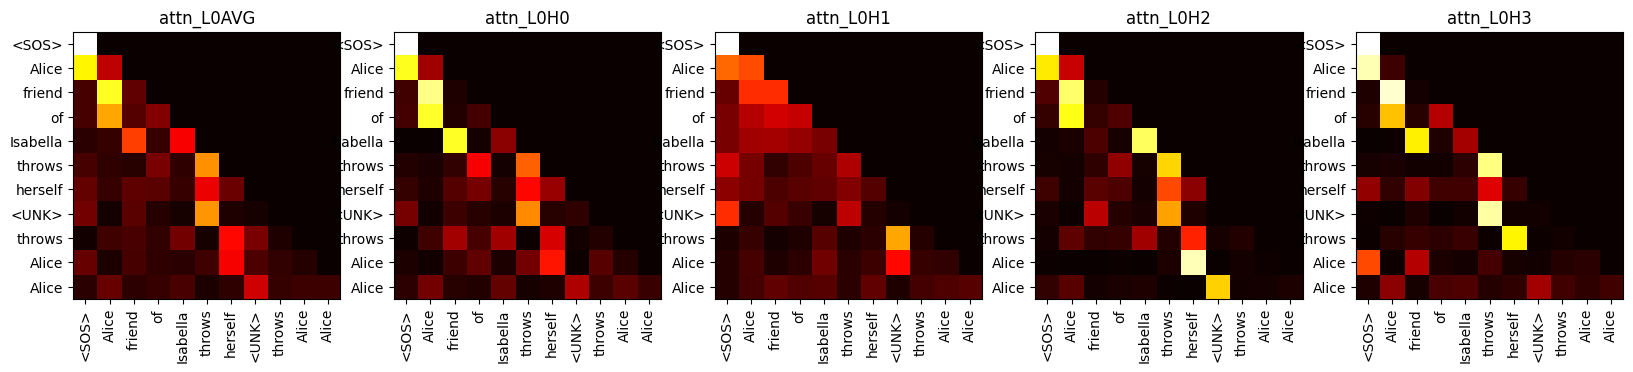

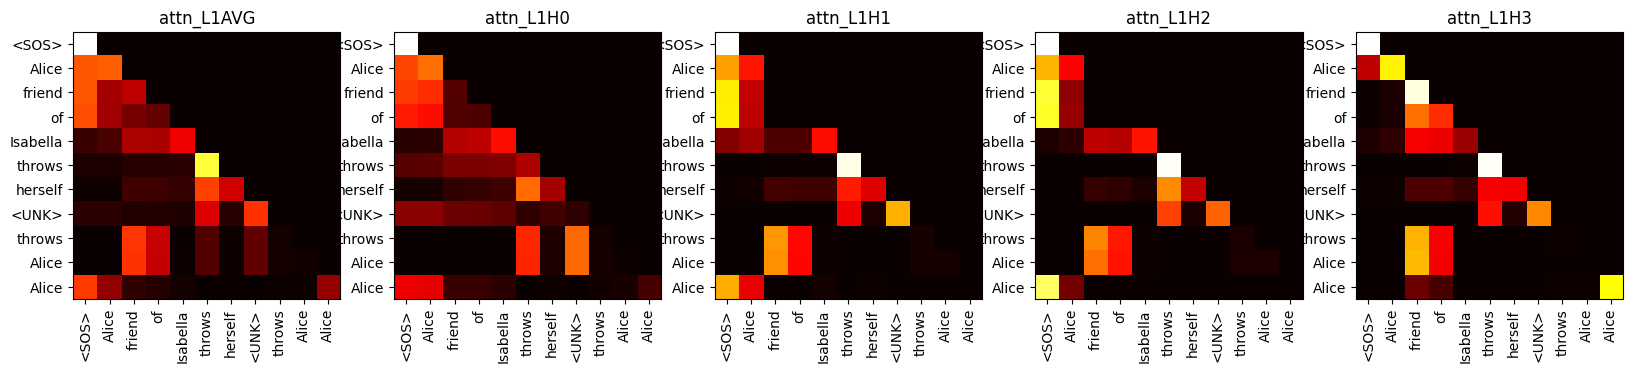

===== TESTING NEW EXAMPLE =====
input: <SOS> Alice friend of Isabella throws herself <UNK> throws Alice Alice
model out: throws Alice Alice <EOS>
correct :)


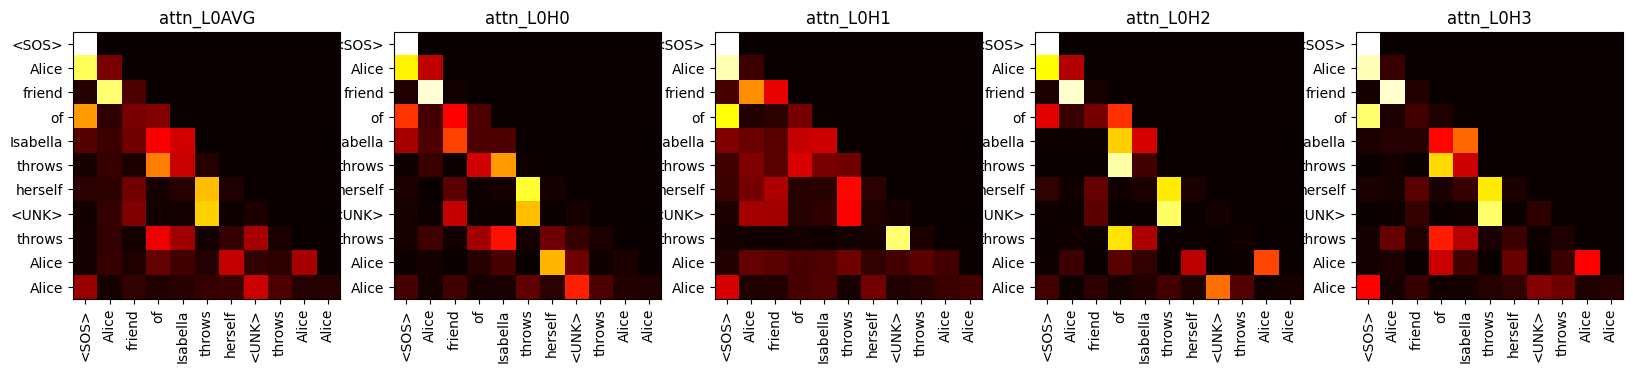

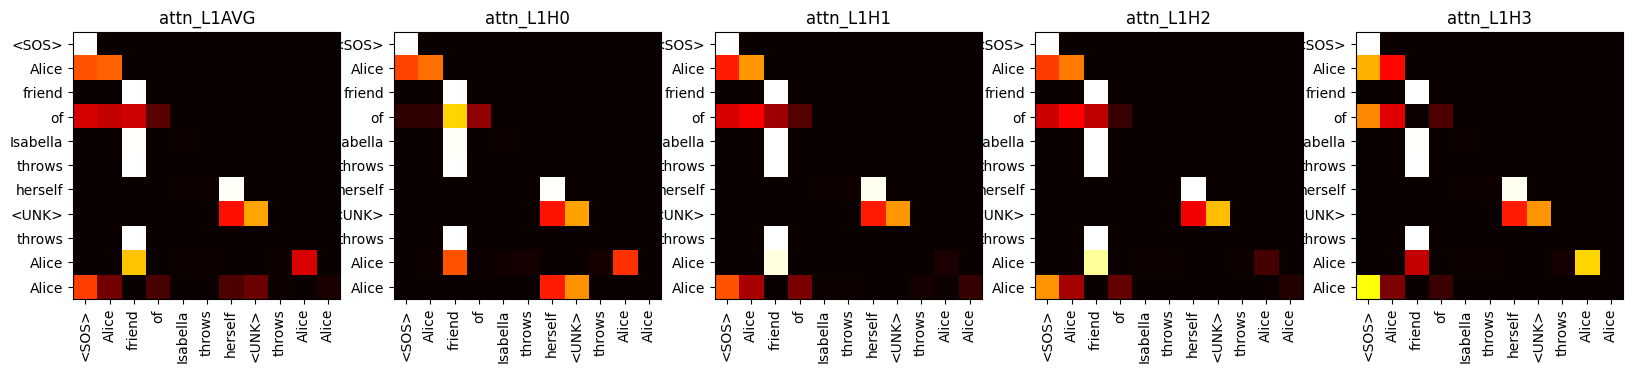

In [3]:
for i in range(3):
    model_relational = load(f"./models/attnOnly_{i}")
    idx = 40
    print("correct :)") if test_example(model_relational, ds_test[idx], ds_test) else print("wrong :'(")
    plot_attn_patterns(model_relational, ds_test[idx], ds_test)

===== TESTING NEW EXAMPLE =====
input: <SOS> Alice friend of Isabella throws herself <UNK> throws Alice Alice
model out: throws Alice Alice <EOS>
correct :)


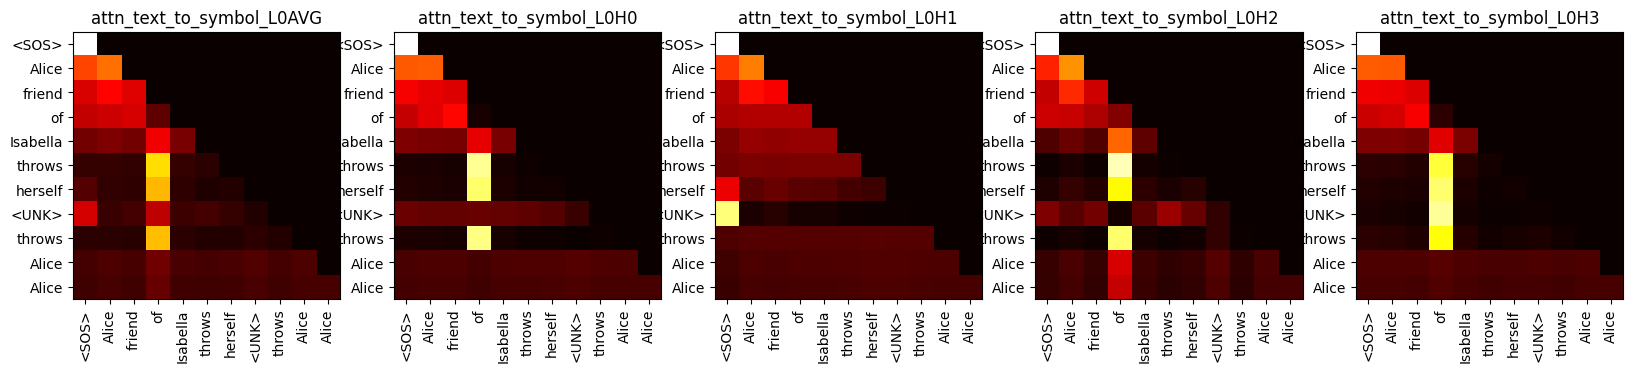

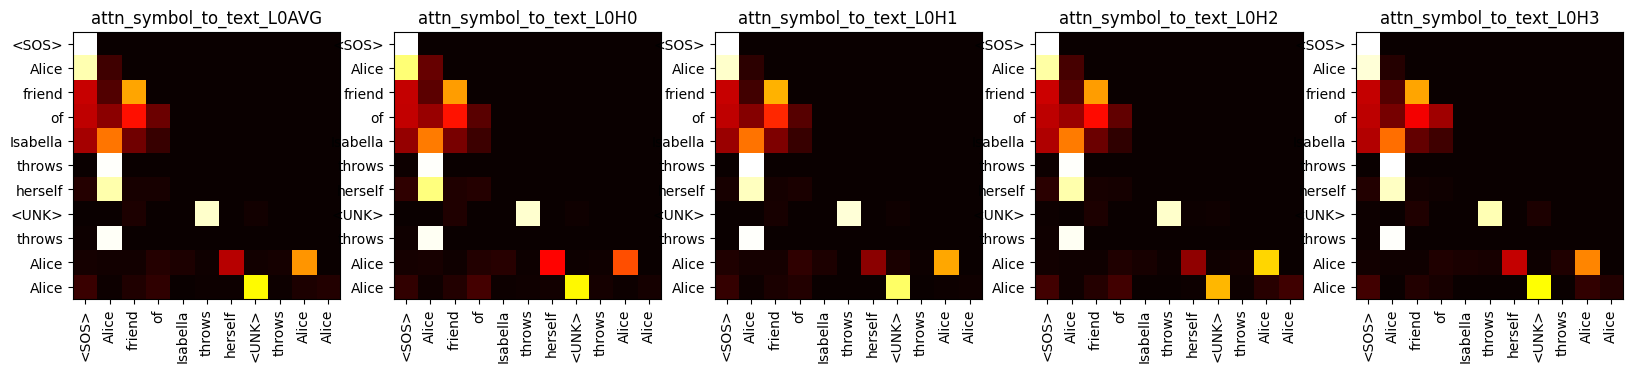

===== TESTING NEW EXAMPLE =====
input: <SOS> Alice friend of Isabella throws herself <UNK> throws Alice Alice
model out: throws Alice Alice <EOS>
correct :)


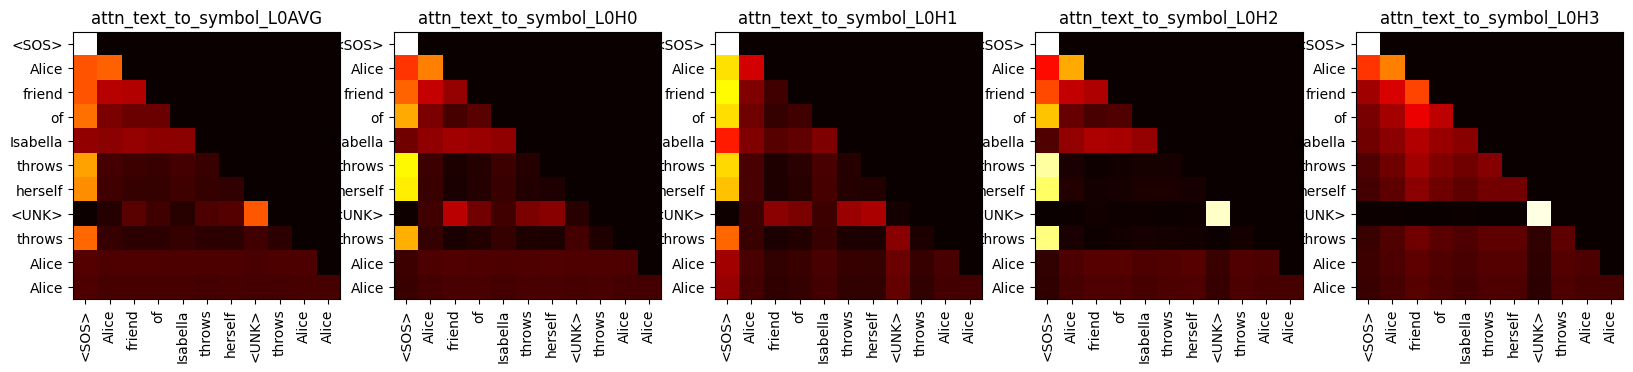

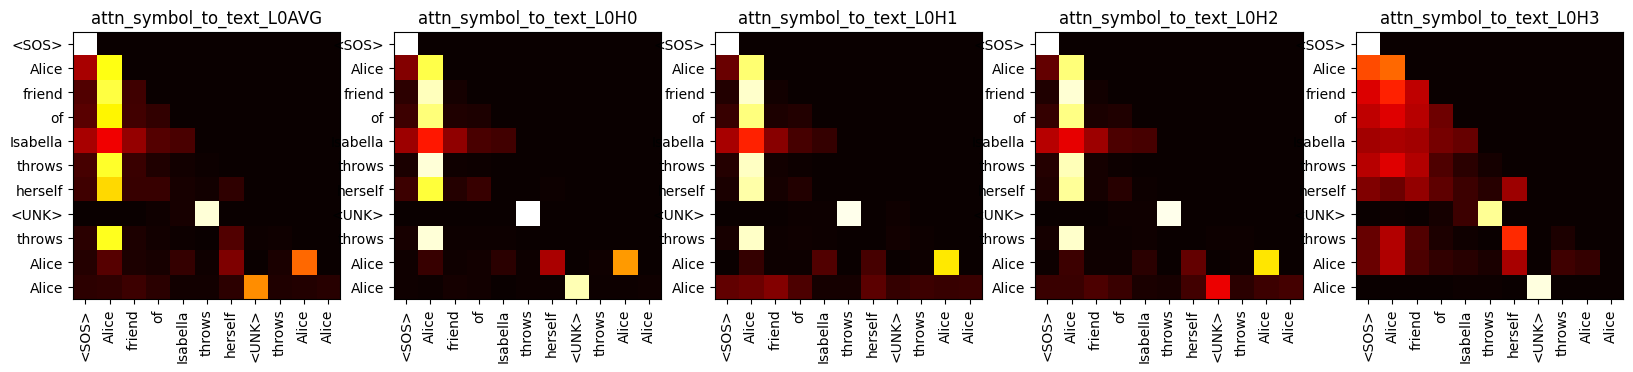

===== TESTING NEW EXAMPLE =====
input: <SOS> Alice friend of Isabella throws herself <UNK> throws Alice Alice
model out: throws Alice Alice <EOS>
correct :)


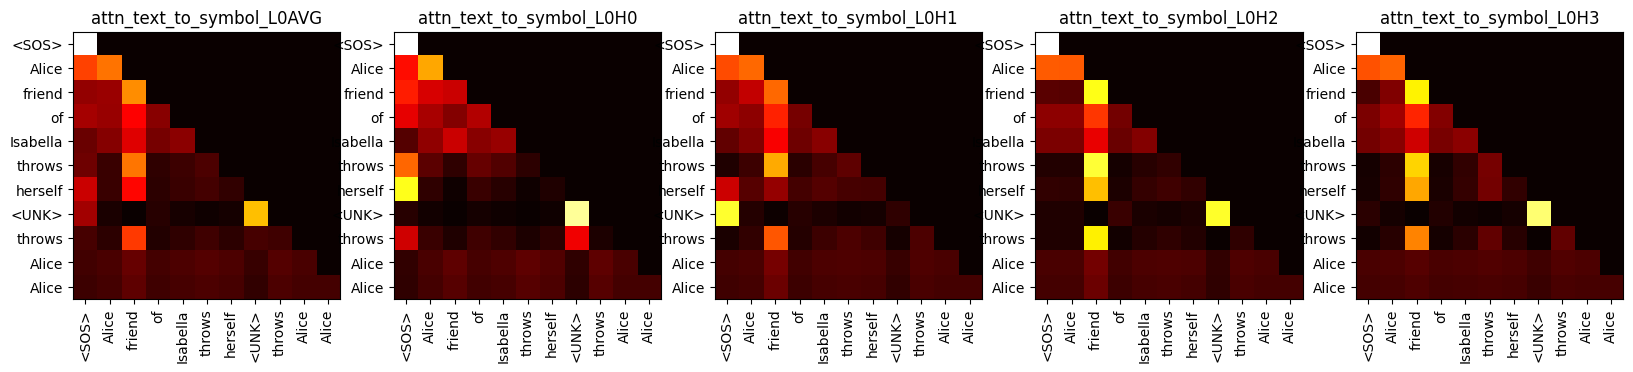

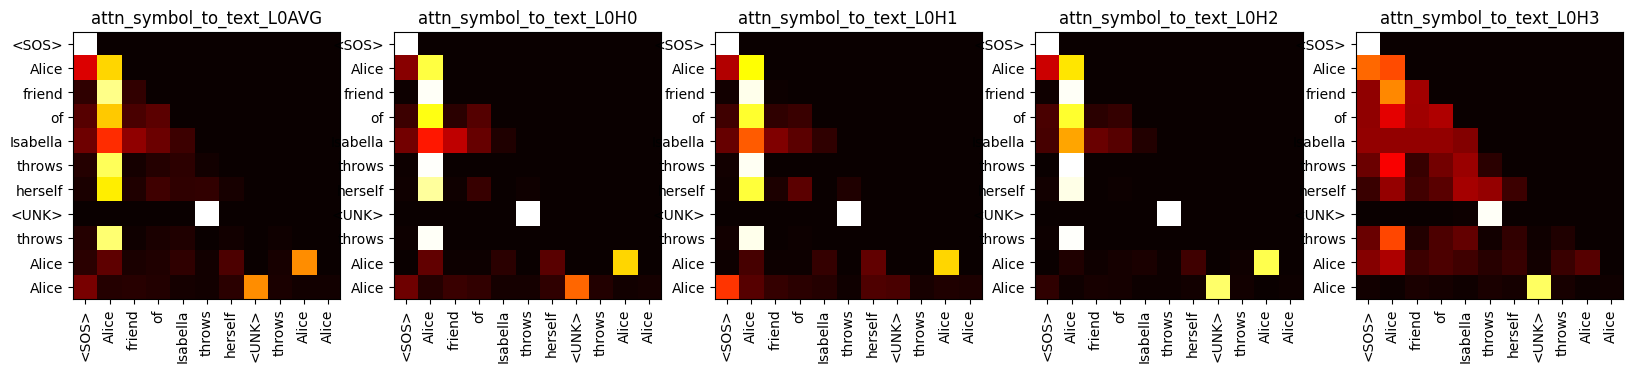

In [4]:
for i in range(3):
    model_relational = load(f"./models/relational_{i}")
    print("correct :)") if test_example(model_relational, ds_test[idx], ds_test) else print("wrong :'(")
    plot_attn_patterns(model_relational, ds_test[idx], ds_test)

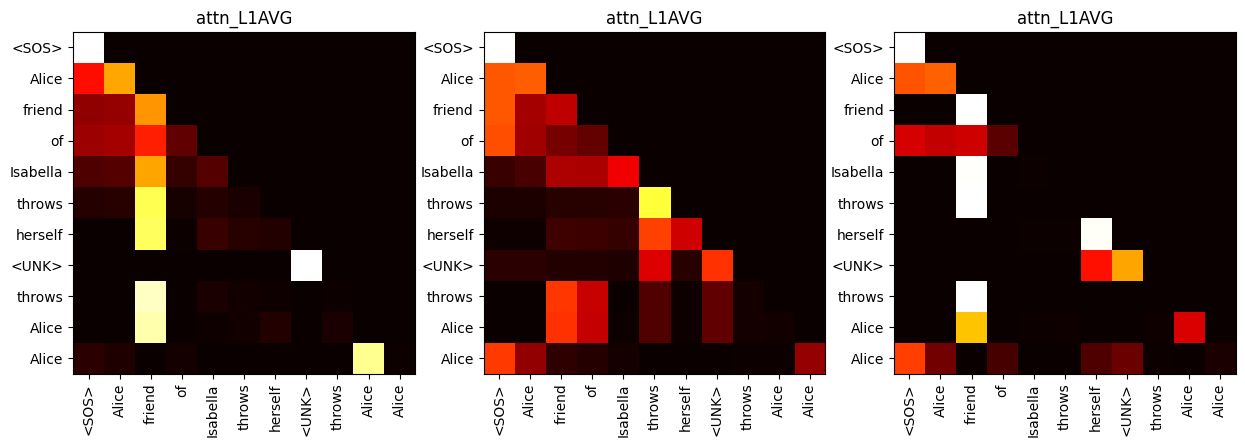

In [5]:
attnOnly_models = []
for i in range(3):
    attnOnly_models.append(load(f"./models/attnOnly_{i}"))
    ds_test[i]

idx = 40
plot_final_patterns(attnOnly_models, [ds_test[idx] for model in attnOnly_models], ds_test, loc="final")

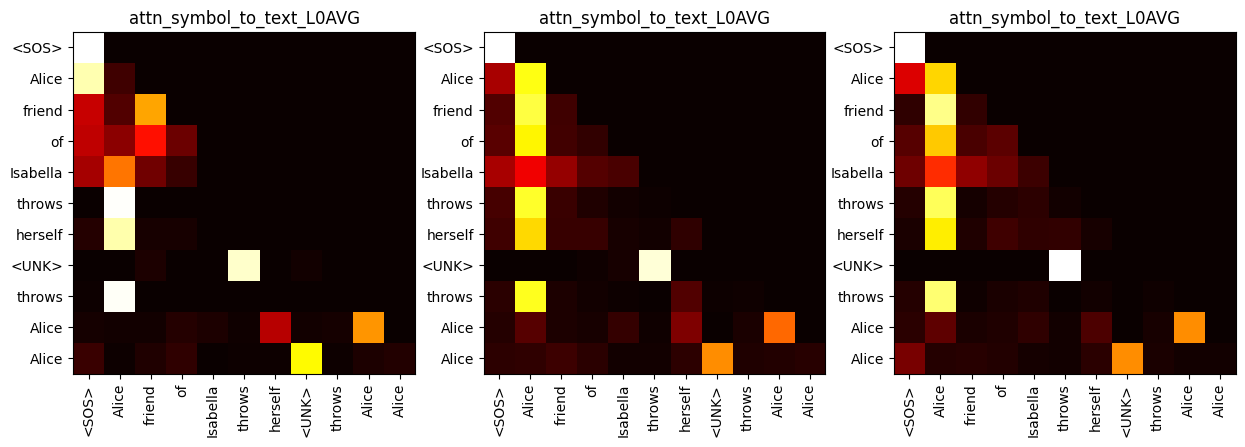

In [6]:
relational_models = []
for i in range(3):
    relational_models.append(load(f"./models/relational_{i}"))
    ds_test[i]

idx = 40
plot_final_patterns(relational_models, [ds_test[idx] for model in attnOnly_models], ds_test, loc="final")

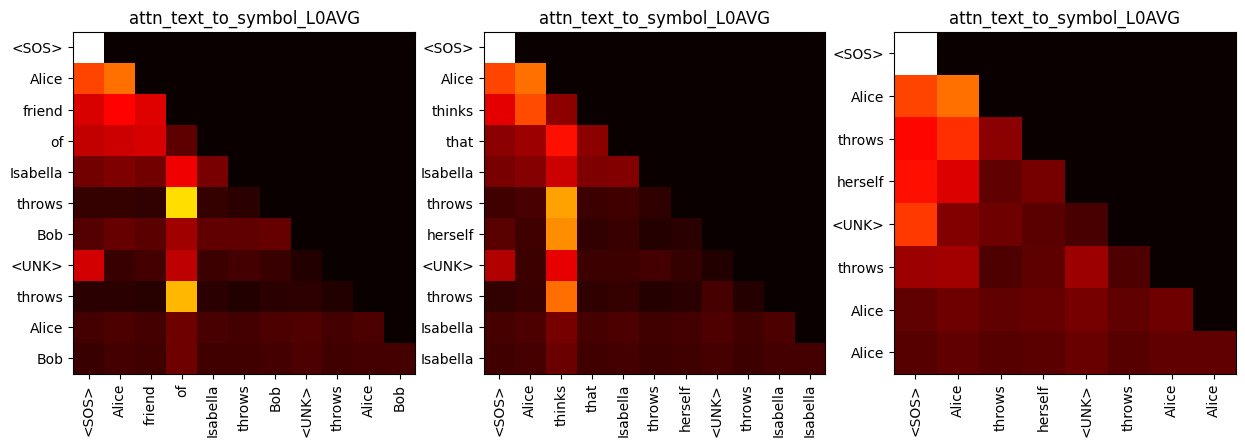

In [8]:
examples = []
examples.append("<SOS> Alice friend of Isabella throws Bob <UNK> throws Alice Bob <EOS>")
examples.append("<SOS> Alice thinks that Isabella throws herself <UNK> throws Isabella Isabella <EOS>")
examples.append("<SOS> Alice throws herself <UNK> throws Alice Alice <EOS>")
examples = [ds_train.ids_from_chars(example) for example in examples]

plot_final_patterns([relational_models[0] for i in examples], examples, ds_test, loc="start")

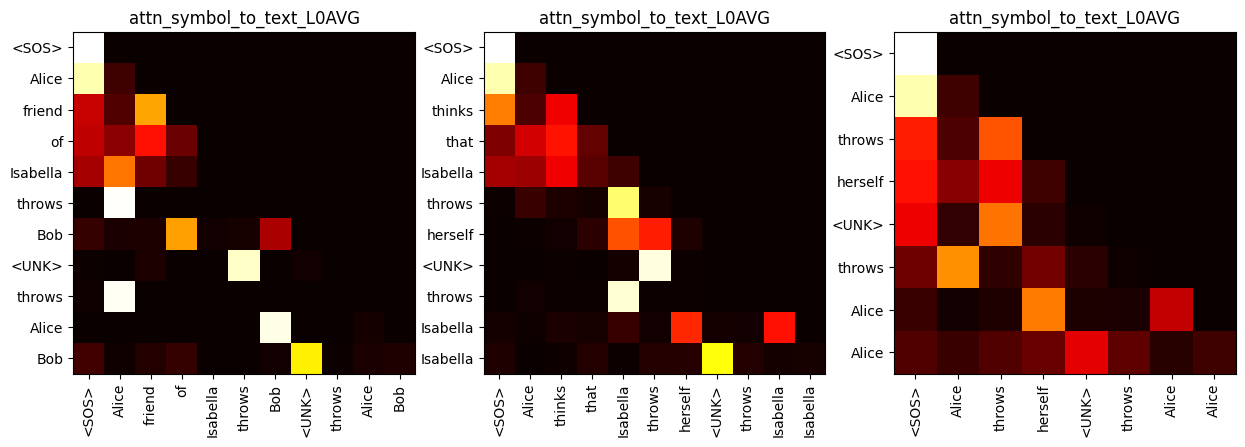

In [283]:
examples = []
examples.append("<SOS> Alice friend of Isabella throws Bob <UNK> throws Alice Bob <EOS>")
examples.append("<SOS> Alice thinks that Isabella throws herself <UNK> throws Isabella Isabella <EOS>")
examples.append("<SOS> Alice throws herself <UNK> throws Alice Alice <EOS>")
examples = [ds_train.ids_from_chars(example) for example in examples]

plot_final_patterns([relational_models[0] for i in examples], examples, ds_test, loc="final")

In [284]:
from generate_anaphora_corpuses import transitive_verbs, names
from collections import defaultdict

sentences = defaultdict(list)
num = 5000
n = 0
for i in range(num):
    n += 1
    example = ds_train.chars_from_ids(ds_train[n])
    while "himself" in example or "herself" in example:
        example = ds_train.chars_from_ids(ds_train[n])
        n += 1
    if "friend" in example:
        sentences["friend_of_distractor"].append(example)
    elif "thinks" in example:
        sentences["thinks_that"].append(example)
    else:
        sentences["no_distractor"].append(example)

    
n = 0
for i in range(num):
    n += 1
    example = ds_train.chars_from_ids(ds_train[n])
    while (not "himself" in example) and (not "herself" in example):
        example = ds_train.chars_from_ids(ds_train[n])
        n += 1
    if "friend" in example:
        sentences["friend_of_distractor"].append(example)
    elif "thinks" in example:
        sentences["thinks_that_distractor"].append(example)
    else:
        sentences["no_distractor"].append(example)

In [293]:
def get_role(n, example, key):
    if example[n] in names:
        if example[n-1] == "<SOS>":
            return "name_PHRASE_POS_ONE"

        if example[n+1] == "<UNK>":
            return "name_OBJ"

        if example[n+1] in transitive_verbs:
            if example[n-1] == "of":
                return "name_PHRASE_POS_TWO"
        if example[n+1] in names:
            if "herself" in example or "himself" in example:
                return "name_PARSED_SUBJECT_reflexivePresent"
            else:
                return "name_PARSED_SUBJECT_reflexiveAbsent"
        if example[n+1] == "<EOS>":
            return "name_PARSED_OBJECT"

    if example[n] in transitive_verbs:
        if example[n-1] == "<UNK>":
            return f"verb_{key}_PARSED"
        else:
            return f"verb_{key}"
        
    if example[n] == "herself":
        return "reflexive"
    else:
        return example[n]

In [294]:
embeddings_by_role = defaultdict(list)

types = sentences.keys()

model = load("./models/relational_2")
for key in sentences.keys():
    for example in sentences[key]:
        model(ds_train.ids_from_chars(example).reshape(-1, 1))
        Sp = model.cache["a_0"] #S prime, S'. The symbolic embedding

        for n, word in enumerate(example.split()):
            embeddings_by_role[get_role(n, example.split(), key)].append(Sp[n, 0])

0.8635613893047759


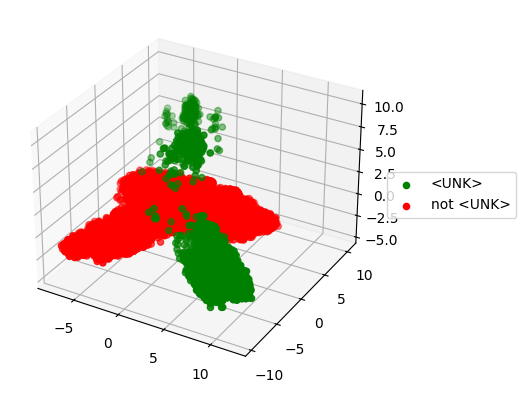

In [295]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


important_roles = [role for role in embeddings_by_role]
all_embeddings = []
for role in important_roles:
    all_embeddings += embeddings_by_role[role]

pca = PCA(n_components = 3)
pca = pca.fit(all_embeddings)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

projections_by_role = defaultdict(list)
for n, role in enumerate(important_roles):
    projections_by_role[role] = pca.transform(embeddings_by_role[role])
    c = "green" if role == "<UNK>" else "red"
    label = "<UNK>" if role == "<UNK>" else "not <UNK>"

    if role == "<EOS>" or role == "<UNK>":
        ax.scatter(projections_by_role[role][:, 0], projections_by_role[role][:, 1], projections_by_role[role][:, 2], c=c, label=label)
    else:
        ax.scatter(projections_by_role[role][:, 0], projections_by_role[role][:, 1], projections_by_role[role][:, 2], c=c)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(sum(pca.explained_variance_ratio_))

0.9769582388075586


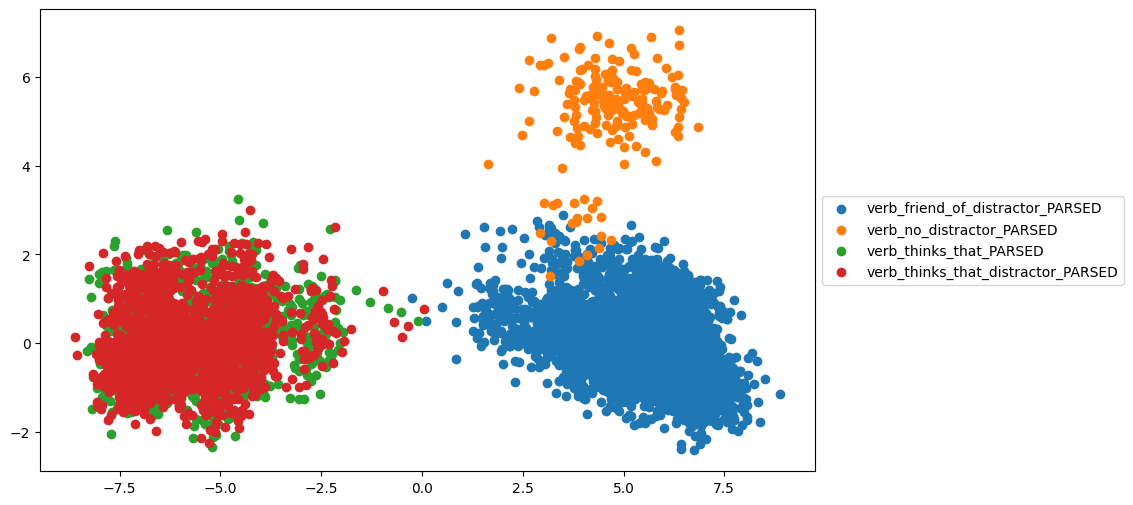

In [296]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


important_roles = [role for role in embeddings_by_role if ("verb" in role and "PARSED" in role)]
all_embeddings = []
for role in important_roles:
    all_embeddings += embeddings_by_role[role]

pca = PCA(n_components = 2)
pca = pca.fit(all_embeddings)

plt.figure(figsize=(10, 6))
projections_by_role = defaultdict(list)
for n, role in enumerate(important_roles):
    projections_by_role[role] = pca.transform(embeddings_by_role[role])
    plt.scatter(projections_by_role[role][:, 0], projections_by_role[role][:, 1], label=role)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(sum(pca.explained_variance_ratio_))

0.8839229615166362


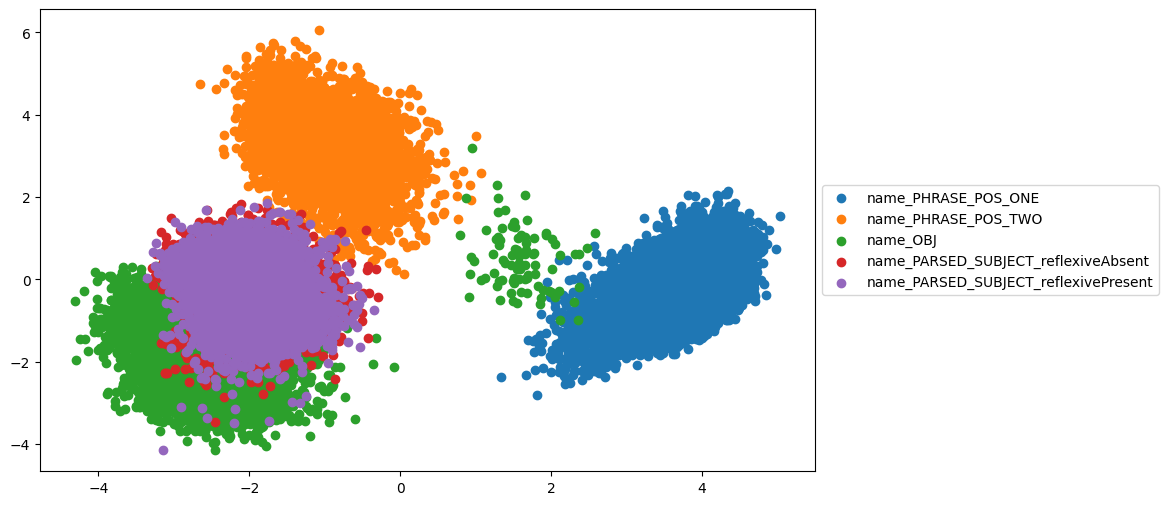

In [297]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


important_roles = [role for role in embeddings_by_role if "name" in role and not "PARSED_OBJECT" in role]
all_embeddings = []
for role in important_roles:
    all_embeddings += embeddings_by_role[role]

pca = PCA(n_components = 3)
pca = pca.fit(all_embeddings)

plt.figure(figsize=(10, 6))
projections_by_role = defaultdict(list)
for n, role in enumerate(important_roles):
    projections_by_role[role] = pca.transform(embeddings_by_role[role])
    plt.scatter(projections_by_role[role][:, 0], projections_by_role[role][:, 1], label=role)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(sum(pca.explained_variance_ratio_))

0.6505337154051456


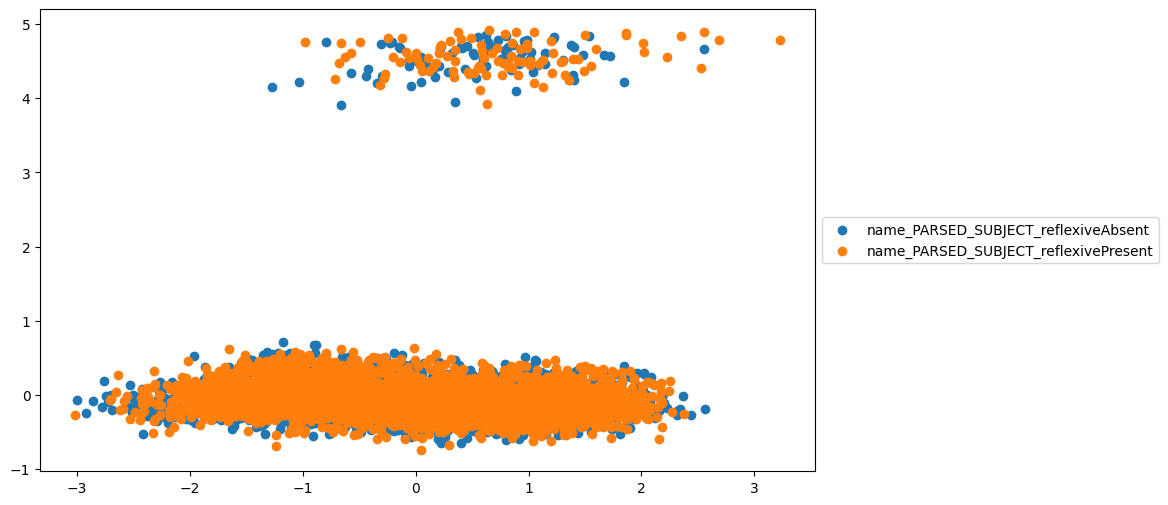

In [298]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt


important_roles = [role for role in embeddings_by_role if "PARSED_SUBJECT" in role]
all_embeddings = []
for role in important_roles:
    all_embeddings += embeddings_by_role[role]

pca = PCA(n_components = 3)
pca = pca.fit(all_embeddings)

plt.figure(figsize=(10, 6))
projections_by_role = defaultdict(list)
for n, role in enumerate(important_roles):
    projections_by_role[role] = pca.transform(embeddings_by_role[role])
    plt.scatter(projections_by_role[role][:, 0], projections_by_role[role][:, 1], label=role)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(sum(pca.explained_variance_ratio_))

In [370]:
avg_embeddings_by_role = dict()
for role in embeddings_by_role:
    avg_embeddings_by_role[role] = np.mean(embeddings_by_role[role], axis=0)

In [375]:
import torch


def test_avg_embeddings(example, model, ds, verbose = True):
    break_point = example.split().index("<UNK>")

    model_input = ds.ids_from_chars(example).view(-1, 1)
    model(model_input)
    Sp = model.cache["a_0"]
    for pos in range(break_point, len(Sp)):
        if "friend" in example:
            key = "friend_of_distractor"
        elif "thinks" in example:
            key = "thinks_that_distractor"
        else:
            key = "no_distractor"

        role = get_role(pos, example.split(), key=key)
        avg_embed = avg_embeddings_by_role[role]

        Sp[pos] = torch.tensor(avg_embed)

    x = model.cache["x"]
    a = Sp

    for n, block in enumerate(model.rev_blocks):
        x, attn_output_weights = block(a, x)
        model.cache[f"x_{n}"] = x.detach()
        model.cache[f"attn_symbol_to_text_L{n}"] = attn_output_weights.detach()

    model_out = model.unembedding(x)[:-1]

    _, pred = model_out[:, 0].topk(1)
    target = example.split()[break_point+1:]
    if verbose:
        print(f"input: {example}")
        print(f"model out: {ds.chars_from_ids(pred.flatten()[break_point:])}")

    return torch.all(pred.flatten()[break_point:] == ds.ids_from_chars(" ".join(target))).item()

In [383]:
from tqdm import tqdm

correct = []
for sample in tqdm(ds_train):
    example = ds_test.chars_from_ids(sample)
    correct.append(test_avg_embeddings(example, model, ds_test, verbose = False))

np.mean(correct)

 18%|█▊        | 10618/57791 [00:17<01:17, 607.29it/s]

In [377]:
correct = []
for sample in tqdm(ds_train):
    correct.append(test_example(model, sample, ds_test, verbose = False))

np.mean(correct)

1.0